## Importing the required Libraries.

In [2]:

import pandas as pd
import numpy as np
import sys
import os
import time

import warnings
warnings.filterwarnings('ignore')

In [3]:

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import model_selection
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set_style('white')

from sklearn.model_selection import cross_val_score

In [4]:
df = pd.read_csv('indian_liver_patient.csv')
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [5]:
print(df.columns)
print('*'*50)
for i in df.columns :
    print(i)
    print(df[i].describe())
    print('*'*50)

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')
**************************************************
Age
count    583.000000
mean      44.746141
std       16.189833
min        4.000000
25%       33.000000
50%       45.000000
75%       58.000000
max       90.000000
Name: Age, dtype: float64
**************************************************
Gender
count      583
unique       2
top       Male
freq       441
Name: Gender, dtype: object
**************************************************
Total_Bilirubin
count    583.000000
mean       3.298799
std        6.209522
min        0.400000
25%        0.800000
50%        1.000000
75%        2.600000
max       75.000000
Name: Total_Bilirubin, dtype: float64
**************************************************
Direct_Bilirubin
count    583.000000
m

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


So, column "Albumin_and_Globulin_ratio" has some data missing in it.

In [7]:
df[df['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [8]:

df =  df.rename(columns={'Dataset':'Liver_disease','Alamine_Aminotransferase':'Alanine_Aminotransferase'}, inplace=False)

In [9]:

df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_disease
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [11]:
X = df[['Age', 'Total_Bilirubin', 
        'Direct_Bilirubin',
        'Alkaline_Phosphotase',
        'Alanine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Is_male']]
y = df['Liver_disease']

In [12]:


print ('Total Unhealthy Livers :  {} and its percentage is {} %'.format(df.Liver_disease.value_counts()[0], round(df.Liver_disease.value_counts()[0]/df.Liver_disease.value_counts().sum()*100,2)) )
print ('Total Healthy Livers :  {} and its percentage is {} %'.format(df.Liver_disease.value_counts()[1], round(df.Liver_disease.value_counts()[1]/df.Liver_disease.value_counts().sum()*100,2)) )

Total Unhealthy Livers :  414 and its percentage is 71.5 %
Total Healthy Livers :  165 and its percentage is 28.5 %


In [13]:
df.skew(axis = 0, skipna = True) 

Age                           -0.033591
Total_Bilirubin                4.890768
Direct_Bilirubin               3.199163
Alkaline_Phosphotase           3.753502
Alanine_Aminotransferase       6.527575
Aspartate_Aminotransferase    10.512251
Total_Protiens                -0.292433
Albumin                       -0.048516
Albumin_and_Globulin_Ratio     0.992299
Liver_disease                  0.955179
Is_male                       -1.209212
dtype: float64

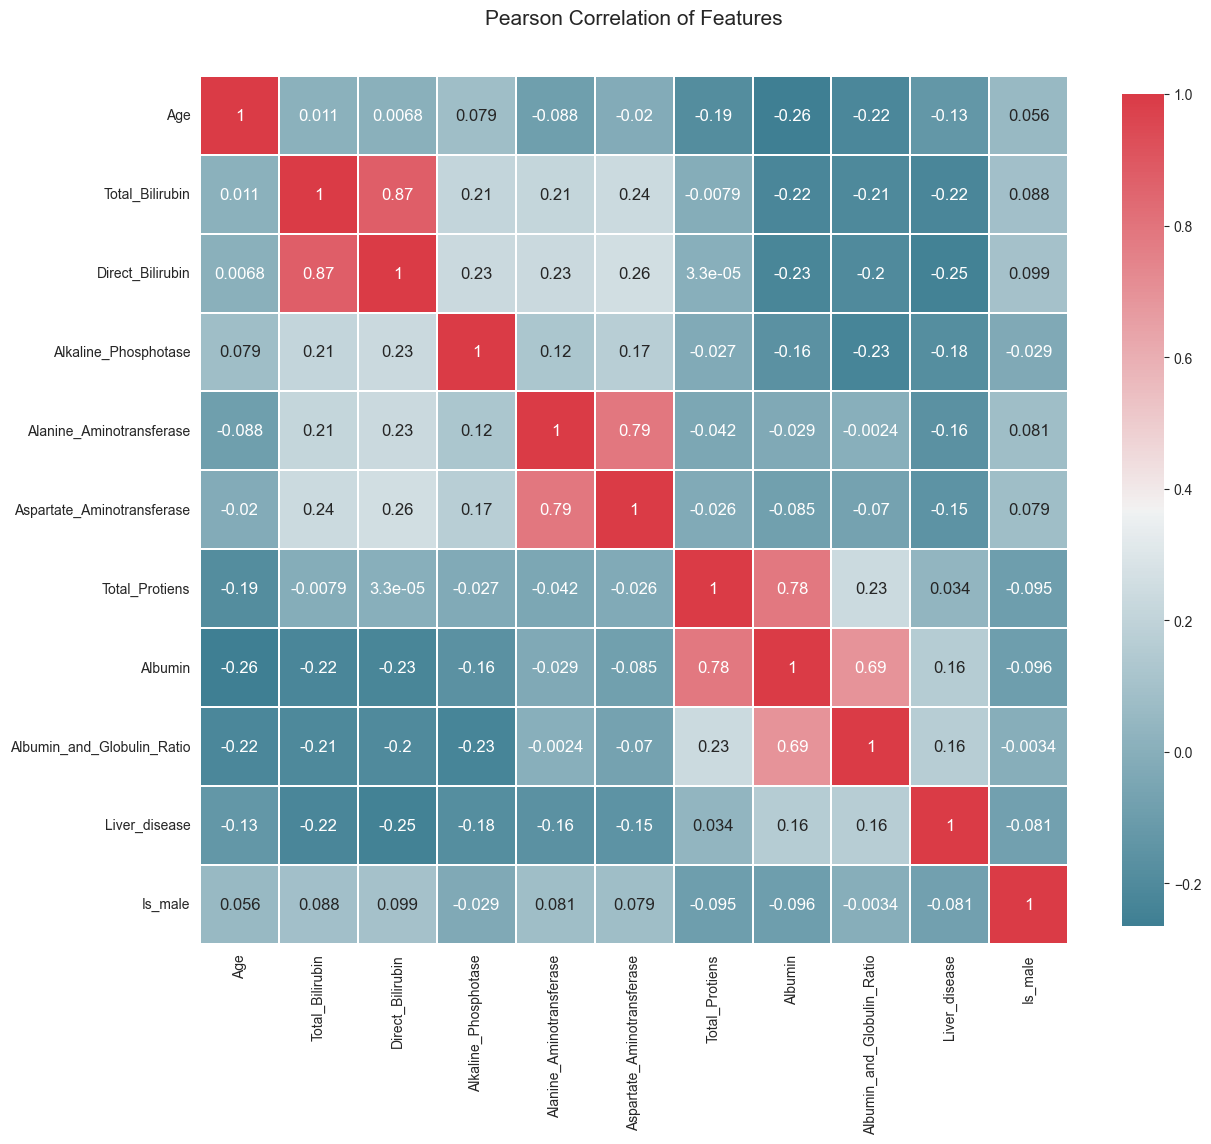

In [17]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

**Before Modelling let us split the data into train and test data**

In [18]:
from sklearn import preprocessing
X_scaler = preprocessing.normalize(X)

In [19]:

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_scaler, y, random_state = 0)

print("Train Shape: {}".format(X_train.shape))
print("Test Shape: {}".format(X_test.shape))


Train Shape: (434, 10)
Test Shape: (145, 10)


 ### K-Nearest Neighbours

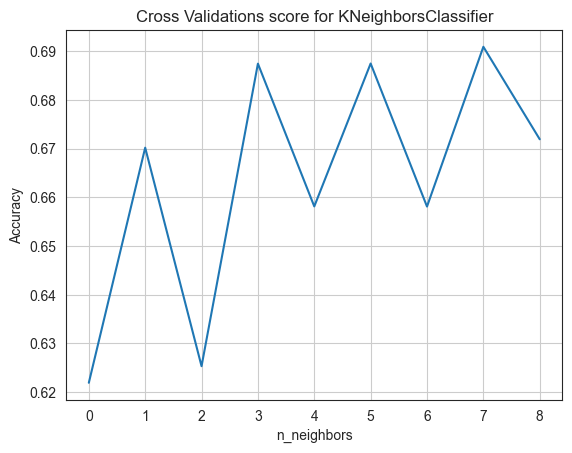

In [20]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
hist = []
for i in range(1,10):
    clf = KNeighborsClassifier(n_neighbors=i)
    cross_val = cross_val_score(clf, X_scaler, y, cv=5)
    hist.append(np.mean(cross_val))
plt.plot(hist)
plt.title('Cross Validations score for KNeighborsClassifier')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [24]:
import pickle
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
with open('liver.pkl', 'wb') as f:
    pickle.dump(knn, f)

In [22]:
score = knn.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_knn, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_knn))

Score of the model is -  0.6620689655172414
Report card of this model - 
              precision    recall  f1-score   support

           0      0.731     0.837     0.780       104
           1      0.346     0.220     0.269        41

    accuracy                          0.662       145
   macro avg      0.539     0.528     0.524       145
weighted avg      0.622     0.662     0.636       145

Accuracy score -  0.6620689655172414


In [34]:
from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test, y_pred_knn)
# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.528


Text(0.5, 1.0, 'Accuracy Score: 0.6620689655172414')

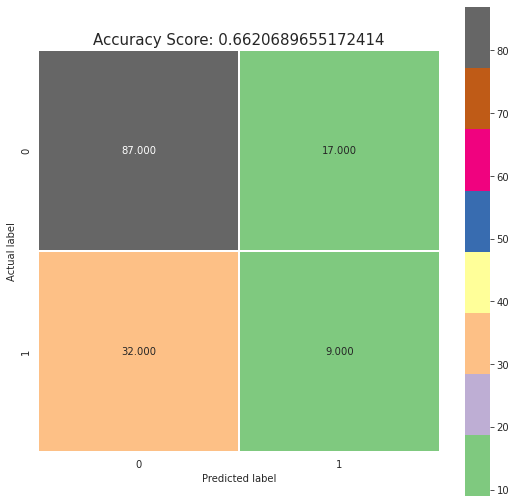

In [35]:
cm4 = metrics.confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(9,9))
sns.heatmap(cm4, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Accent');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

### Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = None , random_state = 1 , max_features = None, min_samples_leaf =20)
dtree.fit(X_train,y_train)
y_pred_dtree = dtree.predict(X_test)

In [37]:
score = dtree.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_dtree, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_dtree))

Score of the model is -  0.7517241379310344
Report card of this model - 
              precision    recall  f1-score   support

           0      0.798     0.875     0.835       104
           1      0.581     0.439     0.500        41

    accuracy                          0.752       145
   macro avg      0.689     0.657     0.667       145
weighted avg      0.737     0.752     0.740       145

Accuracy score -  0.7517241379310344


In [38]:
from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test, y_pred_dtree)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.657


Text(0.5, 1.0, 'Accuracy Score: 0.7517241379310344')

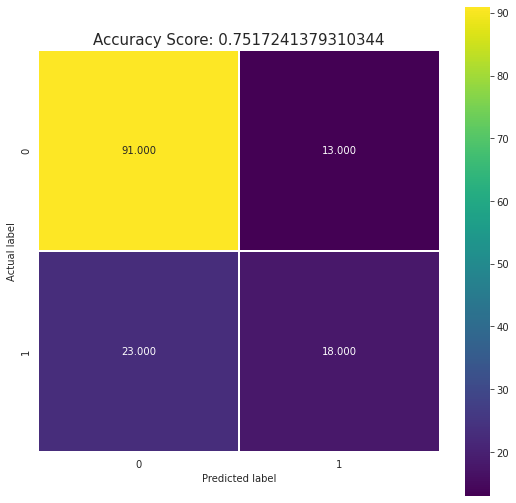

In [39]:
cm5 = metrics.confusion_matrix(y_test, y_pred_dtree)
plt.figure(figsize=(9,9))
sns.heatmap(cm5, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)